In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 2.1 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -1
MAX_VALUE = 1
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np
def sumPowell(x):
  sumY = 0
  for index, xValue in enumerate(x, 1):    
    absX = np.absolute(xValue) 
    powerX = np.power(absX, index + 1)
    sumY += powerX   
  return (sumY,)
  #return (sum(x),)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", sumPowell)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg    	std     	min     	max    
0  	30    	1.49724	0.751845	0.403616	3.91256
1  	182   	0.901891	0.363926	0.106396	1.54587
2  	178   	0.591796	0.260752	0.181502	1.28298
3  	179   	0.393534	0.186481	0.0544925	0.79771
4  	185   	0.245159	0.142669	0.0414375	0.767189
5  	183   	0.154003	0.065291	0.038031 	0.410936
6  	175   	0.104075	0.0321945	0.038031 	0.176776
7  	178   	0.0783091	0.0233748	0.038031 	0.116333
8  	183   	0.0516948	0.0162598	0.0291674	0.0860618
9  	182   	0.0405786	0.00852178	0.0278418	0.0675395
10 	181   	0.0361876	0.00358326	0.0269347	0.0432896
11 	182   	0.0330965	0.00520384	0.0195597	0.038031 
12 	175   	0.027334 	0.00579741	0.019073 	0.0379612
13 	173   	0.0220615	0.00402712	0.018919 	0.0324941
14 	182   	0.0191627	0.000354125	0.0187194	0.0205321
15 	175   	0.0189817	0.000160141	0.0187194	0.0194391
16 	175   	0.018922 	4.06861e-05	0.0187194	0.0189524
17 	171   	0.0189071	5.13712e-05	0.018716 	0.0189524
18 	178   	0.0188851	8.44864e-05	0.0185619	0.018919 


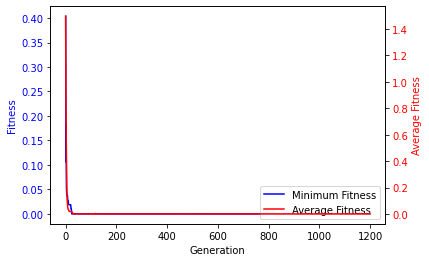

Best individual is Individual('d', [0.00022068522418331208, -0.00032573060025956925, -0.0009742511858134254, 0.00019705445956595512, 5.542971763164016e-05, 0.0004834214595196255, 0.001290950539960992, 0.003413811471983554, -0.0030762388788975366, 0.006216330623171323]), fitness: (4.873742924282087e-08,)
gen	nevals	avg    	std     	min     	max    
0  	30    	1.52109	0.681487	0.261727	2.81902
1  	176   	0.983685	0.434647	0.477229	1.9156 
2  	183   	0.662594	0.243693	0.205982	1.40554
3  	180   	0.436941	0.19839 	0.0779572	0.776264
4  	174   	0.26744 	0.119376	0.0732328	0.477229
5  	184   	0.157017	0.0824435	0.0284929	0.342449
6  	181   	0.116027	0.0651055	0.00940533	0.246386
7  	179   	0.0495475	0.0253054	0.00922644	0.0779572
8  	171   	0.0199042	0.0149095	0.00922644	0.0732328
9  	180   	0.0126532	0.0058618	0.00702266	0.029171 
10 	186   	0.0109602	0.00431336	0.00702266	0.0216715
11 	175   	0.00825131	0.000954759	0.00702266	0.00940533
12 	182   	0.00730046	0.00128619 	0.00362543	0.009267

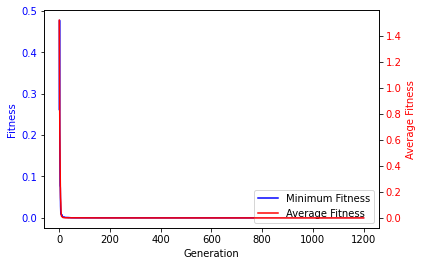

Best individual is Individual('d', [4.9764115386282336e-05, 0.0028523329388700416, -0.0017800422417552416, 0.0005103029424652203, -0.010416682413531603, 0.0012180200336311892, 0.0011263064328507144, -0.0007183154194582977, -0.00677518010330861, -0.0043232931754915984]), fitness: (2.5693803907173225e-08,)
gen	nevals	avg    	std     	min     	max    
0  	30    	1.69148	0.730003	0.182307	3.18137
1  	182   	0.980954	0.525058	0.371793	2.18239
2  	179   	0.510672	0.176817	0.23705 	1.13892
3  	180   	0.377634	0.0786242	0.128415	0.513227
4  	177   	0.283823	0.0950362	0.124539	0.454098
5  	176   	0.192371	0.0773635	0.124539	0.421332
6  	179   	0.126722	0.0367893	0.036507	0.189006
7  	183   	0.0863753	0.0426428	0.0299461	0.16672 
8  	174   	0.0536402	0.0356414	0.023546 	0.124539
9  	186   	0.0309673	0.00512847	0.0199571	0.0372028
10 	179   	0.0258554	0.00406637	0.0194549	0.0333263
11 	179   	0.0227255	0.00206194	0.0184872	0.0285701
12 	183   	0.0202654	0.00159507	0.017799 	0.0231662
13 	177   	0

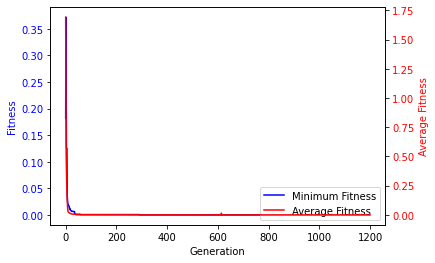

Best individual is Individual('d', [-0.0005214710861345985, -0.0003348126905862288, -0.0017140185603299056, -0.003669634804099861, -0.007436027067608222, 0.00040568586523095094, -0.0014746654128309205, -0.0003696537476276301, 0.008092005256166629, 0.0030024431202308535]), fitness: (2.719790915515065e-07,)
gen	nevals	avg    	std     	min     	max   
0  	30    	1.69829	0.662295	0.454251	2.6449
1  	181   	1.14221	0.578676	0.0543781	2.09617
2  	172   	0.685775	0.355422	0.0543781	1.733  
3  	183   	0.341876	0.248472	0.0406576	0.961578
4  	179   	0.16956 	0.108923	0.0616232	0.641298
5  	183   	0.113732	0.0580016	0.0402776	0.20279 
6  	170   	0.0688511	0.0331496	0.0402776	0.162025
7  	172   	0.052864 	0.0201293	0.037136 	0.150818
8  	178   	0.043431 	0.00447751	0.0364599	0.0586737
9  	182   	0.0397993	0.00300342	0.0356571	0.0462459
10 	188   	0.0370755	0.00196324	0.0300487	0.0420683
11 	179   	0.0351207	0.00236318	0.0296888	0.0366799
12 	172   	0.0326476	0.00244238	0.0295926	0.0366799
13 	177

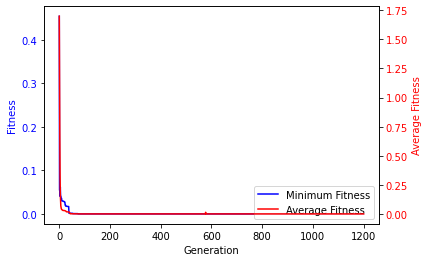

Best individual is Individual('d', [-0.0002962067752861467, -0.0006703766097497224, 0.0008553235624649616, -0.0005525684793495935, -0.0005543438090411332, -0.0024262310750851265, 0.0015273903346582785, 0.00020908795635086498, -0.0012313526378600302, 0.002846662669309292]), fitness: (8.804025944989816e-08,)
gen	nevals	avg    	std     	min     	max    
0  	30    	1.61088	0.704322	0.520691	3.33244
1  	179   	1.00163	0.410602	0.39606 	2.19841
2  	178   	0.698166	0.266271	0.0836285	1.54821
3  	183   	0.445731	0.160977	0.0836285	0.721348
4  	190   	0.368395	0.0946118	0.119322 	0.501414
5  	178   	0.308099	0.115573 	0.0943831	0.708123
6  	180   	0.218462	0.0737567	0.0762035	0.376972
7  	180   	0.156918	0.0455636	0.0735779	0.240982
8  	187   	0.131622	0.0336948	0.055426 	0.213613
9  	177   	0.101978	0.0303636	0.0414908	0.159688
10 	176   	0.0854386	0.0198131	0.0414908	0.109716
11 	180   	0.0625791	0.0157862	0.0327082	0.102783
12 	177   	0.0480144	0.0104484	0.0310546	0.0643369
13 	178   	0.0388

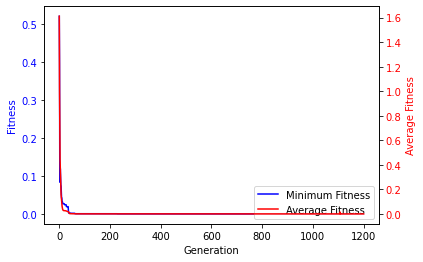

Best individual is Individual('d', [5.047733329513731e-05, -0.002183780046335744, -0.004845151014451821, -0.002846903247486636, -0.003932529458911507, -0.00482961558841989, -0.0025338048157133135, -0.002783979978676859, -3.576786194974674e-05, 0.005088857583579368]), fitness: (1.3513468878338978e-08,)


In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    
    
    print("Best individual is %s, fitness: %s" % (hof[0], hof[0].fitness.values))

    #plt.figure(1, figsize=(7, 4))
    #plt.plot(logbook.select('avg'), 'b-', label='Avg. fitness')
    #plt.fill_between(range(len(logbook)), logbook.select('max'), logbook.select('min'), facecolor='blue', alpha=0.47)
    #plt.plot(logbook.select('std'), 'm--', label='Std. deviation')
    #plt.legend(frameon=True)
    #plt.ylabel('Fitness'); plt.xlabel('Iterations');



    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()